In [4]:
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import collections as c
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
pwd

'/Users/jeremymiller/GoogleDrive/Data_Science/Galvanize/dsi-capstone/models'

In [2]:
# model = pickle.load(open('logistic_regression_completion.p', 'rb')) # load the model

In [5]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
def scale_subset(df, columns):
    '''
    Use sklearn StandardScalar to scale only numeric columns.

    Parameters:
    ----------
    input {dataframe, list}: dataframe containing mixed feature variable types, list of names of numeric feature columns
    output: {dataframe}: dataframe with numeric features scaled and categorical features unchanged

    '''
    scalar = StandardScaler()
    numeric = df[columns]
    categorical = df.drop(columns, axis = 1)
    scalar.fit(numeric)
    num_scaled = pd.DataFrame(scalar.transform(numeric))
    num_scaled.rename(columns = dict(zip(num_scaled.columns, numeric_cols)), inplace = True)
    return pd.concat([num_scaled, categorical], axis = 1)


In [7]:
X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_train = y_train['module_not_completed']
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')
y_test = y_test['module_not_completed']
numeric_cols = ['num_of_prev_attempts', 'studied_credits',
'clicks_per_day', 'pct_days_vle_accessed','max_clicks_one_day',
'first_date_vle_accessed', 'avg_score', 'avg_days_sub_early', 'days_early_first_assessment',
'score_first_assessment']
# fill and scale
X_train.fillna(value = 0, inplace = True)
X_train = scale_subset(X_train, numeric_cols)
X_test.fillna(value = 0, inplace = True)
X_test = scale_subset(X_test, numeric_cols)


/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [8]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
predictions = model.predict(X_test)

In [10]:
recall = recall_score(y_test, predictions)
recall

0.8311165558277914

In [11]:
roc_auc = roc_auc_score(y_test, predictions)
roc_auc

0.8746006206127481

In [12]:
probas = model.predict_proba(X_test)[:, :1]
tprs, fprs, thresh = roc_curve(y_test, probas)

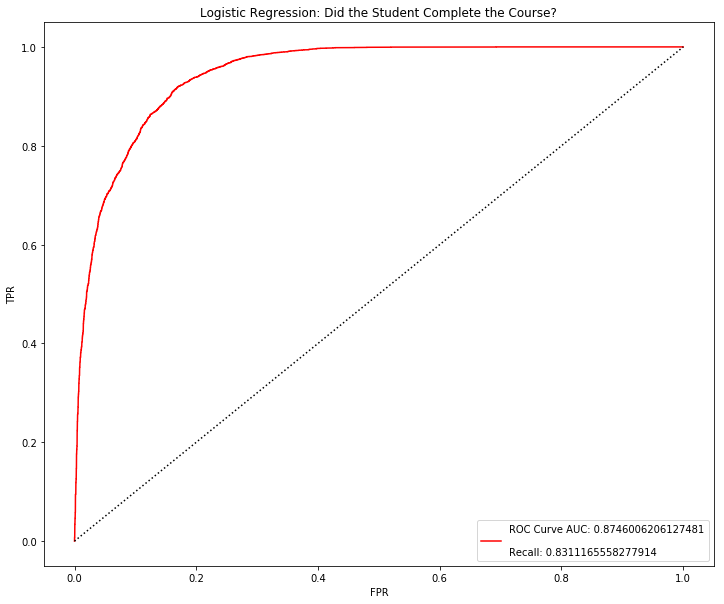

In [13]:
plt.figure(figsize=(12,10))
plt.plot(fprs, tprs, 
    label='ROC Curve AUC: {}\n\nRecall: {}'.format(roc_auc, recall),
    color='red')
plt.plot([0,1],[0,1], 'k:')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Logistic Regression: Did the Student Complete the Course?")
plt.show()

# Which features are most important?

In [14]:
model.feature_importances_

array([4.23407929e-03, 9.37327756e-03, 1.52012778e-01, 2.37115327e-01,
       6.07122332e-02, 2.34893267e-02, 1.55099547e-01, 6.93716912e-02,
       1.28783745e-01, 6.62180318e-02, 8.75034278e-03, 1.95252336e-03,
       5.74001798e-03, 2.31646990e-03, 2.48150635e-02, 7.51708478e-03,
       0.00000000e+00, 1.88527091e-03, 1.40480932e-03, 3.57478467e-03,
       0.00000000e+00, 3.50312048e-03, 0.00000000e+00, 7.65711533e-04,
       7.94655397e-04, 9.66863286e-04, 6.68294363e-04, 9.97987088e-04,
       1.03063781e-03, 7.50058736e-04, 8.41974342e-04, 8.40314687e-04,
       8.10382403e-04, 8.84536163e-04, 7.14854068e-04, 0.00000000e+00,
       1.33396846e-03, 7.11698287e-03, 3.59271821e-04, 2.55456858e-04,
       0.00000000e+00, 1.51599076e-03, 1.04206786e-03, 8.22032941e-04,
       8.40979742e-04, 9.16519782e-04, 8.50005286e-04, 7.40395226e-04,
       8.67549074e-04, 1.14164042e-03, 9.53039865e-04, 1.60316838e-03,
       2.13174050e-04, 0.00000000e+00, 1.49196158e-03, 0.00000000e+00])

In [15]:
feat_imp = list(list(model.feature_importances_))
features = list(X_test.columns)

In [17]:
coef_dict = c.OrderedDict((zip(feat_imp, features)))

In [18]:
sorted(coef_dict.items(), reverse=True)

[(0.23711532699492058, 'pct_days_vle_accessed'),
 (0.1550995470672349, 'avg_score'),
 (0.15201277832569277, 'clicks_per_day'),
 (0.12878374534429682, 'days_early_first_assessment'),
 (0.0693716911759029, 'avg_days_sub_early'),
 (0.06621803177911852, 'score_first_assessment'),
 (0.06071223323579671, 'max_clicks_one_day'),
 (0.024815063475123984, 'code_module_FFF'),
 (0.023489326707217106, 'first_date_vle_accessed'),
 (0.00937327756280024, 'studied_credits'),
 (0.00875034277890024, 'code_module_BBB'),
 (0.007517084776215179, 'code_module_GGG'),
 (0.007116982873620954, 'highest_education_Lower Than A Level'),
 (0.0057400179841874165, 'code_module_DDD'),
 (0.004234079288879961, 'num_of_prev_attempts'),
 (0.003574784671551393, 'code_presentation_2014J'),
 (0.0035031204841154085, 'gender_M'),
 (0.002316469903060456, 'code_module_EEE'),
 (0.001952523355809356, 'code_module_CCC'),
 (0.0018852709095834514, 'code_presentation_2013J'),
 (0.0016031683754453387, 'age_band_35-55'),
 (0.0015159907639